In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier

### Import & Preprocessing

In [44]:
clover_datasets = ["datasets/clover_shaped/04clover5z-800-7-0-BI.csv", "datasets/clover_shaped/04clover5z-800-7-30-BI.csv", "datasets/clover_shaped/04clover5z-800-7-70-BI.csv"]
paw_datasets = ["datasets/paw_shaped/paw02a-800-7-0-BI.csv", "datasets/paw_shaped/paw02a-800-7-30-BI.csv", "datasets/paw_shaped/paw02a-800-7-70-BI.csv"]
datasets = clover_datasets + paw_datasets


df = pd.read_csv("datasets/paw_shaped/paw02a-800-7-0-BI.csv")
df = df.rename({'y': 'Y'}, axis=1) 
df["Y"].replace({'negative' : int(0), "positive" : int(1)}, inplace=True, regex=True)
df

,dim1,dim2,Y
0,358,400,0
1,404,387,0
2,413,295,0
3,425,431,0
4,415,294,0
...,...,...,...
795,226,635,1
796,29,72,1
797,-21,152,1
798,137,132,1


In [24]:
print(df.shape)
y = df.values[:,-1].astype(int)
X = df.drop("Y", axis=1)

(800, 3)


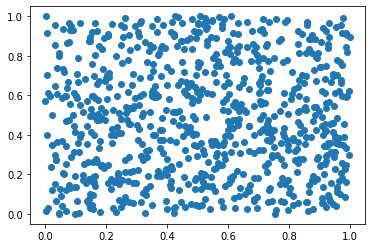

In [39]:
plt.scatter(X['dim1'], X['dim2'])

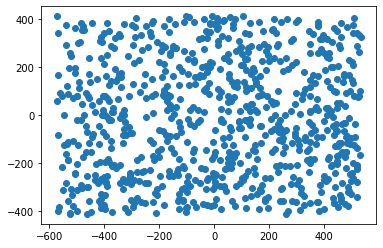

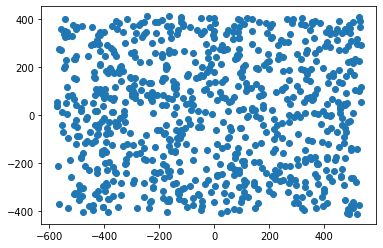

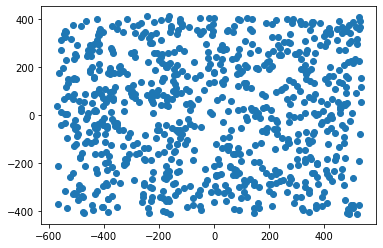

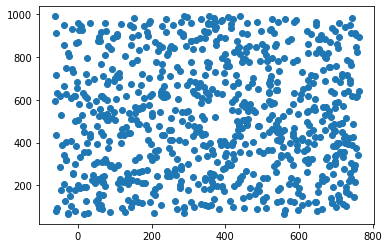

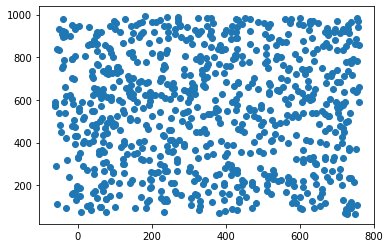

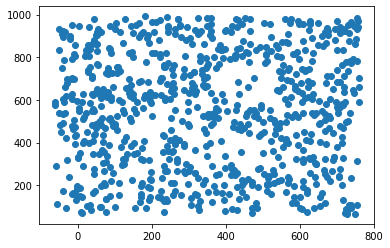

In [62]:
for source in datasets:
    df = pd.read_csv(source)
    df = df.rename({'y': 'Y'}, axis=1) 
    df["Y"].replace({'negative' : int(0), "positive" : int(1)}, inplace=True, regex=True)
    X = df.drop("Y", axis=1)

    plt.scatter(X['dim1'], X['dim2'])

    fname = source.split("/",1)[1].split("/",1)[1].split(".",1)[0]
    plt.savefig('plots/' + fname + '.png', facecolor='w')
    plt.show()

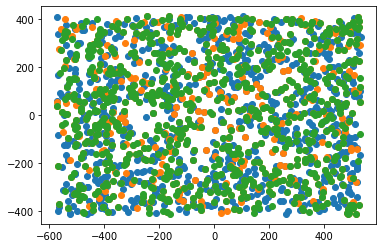

In [64]:
for source in clover_datasets:
    df = pd.read_csv(source)
    df = df.rename({'y': 'Y'}, axis=1) 
    df["Y"].replace({'negative' : int(0), "positive" : int(1)}, inplace=True, regex=True)
    X = df.drop("Y", axis=1)

    plt.scatter(X['dim1'], X['dim2'])

    fname = source.split("/",1)[1].split("/",1)[1].split(".",1)[0]
    plt.savefig('plots/' + fname + '.png', facecolor='w')

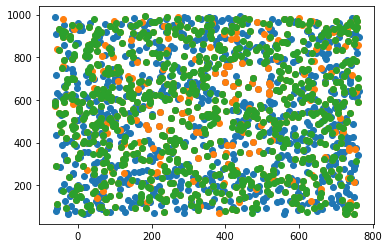

In [65]:
for source in paw_datasets:
    df = pd.read_csv(source)
    df = df.rename({'y': 'Y'}, axis=1) 
    df["Y"].replace({'negative' : int(0), "positive" : int(1)}, inplace=True, regex=True)
    X = df.drop("Y", axis=1)

    plt.scatter(X['dim1'], X['dim2'])

    fname = source.split("/",1)[1].split("/",1)[1].split(".",1)[0]
    plt.savefig('plots/' + fname + '.png', facecolor='w')

### Feature selection & Feature Examination

In [25]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=100, Percentage=12.500%
Class=1, Count=700, Percentage=87.500%


1    700
0    100
dtype: int64


<AxesSubplot:>

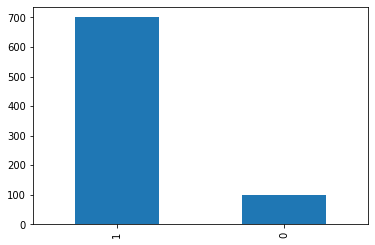

In [26]:
target = pd.Series(y)
print(target.value_counts())
target.value_counts().plot(kind="bar")

In [27]:
scaler = MinMaxScaler()
df_norm = X
df_norm[list(X)] = scaler.fit_transform(df[list(X)])
df_norm

,dim1,dim2
0,0.510303,0.361081
1,0.566061,0.347027
2,0.576970,0.247568
3,0.591515,0.394595
4,0.579394,0.246486
...,...,...
795,0.350303,0.615135
796,0.111515,0.006486
797,0.050909,0.092973
798,0.242424,0.071351


In [28]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
X_new = rfe.fit_transform(df_norm, y)
X_new

array([[0.51030303, 0.36108108],
       [0.56606061, 0.34702703],
       [0.5769697 , 0.24756757],
       ...,
       [0.05090909, 0.09297297],
       [0.24242424, 0.07135135],
       [0.07151515, 0.86594595]])

<BarContainer object of 2 artists>

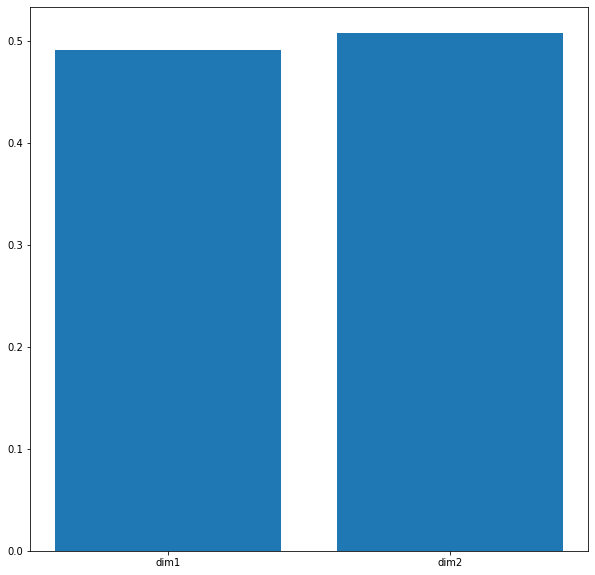

In [29]:
# Feature Selection Using Random Forest
clf = RandomForestClassifier()
clf.fit(df_norm, y)
# Create a figure to plot a bar, where x axis is features, and Y indicating the importance of each feature
plt.figure(figsize=(10,10))
plt.bar(df_norm.columns, clf.feature_importances_)

### Baseline Implementation & Model Training With all Features!!!

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
def evaluate_model(X_train, y_train, X_test, y_test, model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	model.fit(X_train, y_train)
	return cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

models, names = list(), list()
# SVM
models.append(SVC(gamma='auto'))
names.append('SVM')
# KNN
models.append(KNeighborsClassifier())
names.append('KNN')
# RF
models.append(RandomForestClassifier(n_estimators=1000))
names.append(' RF')
# ET
models.append(ExtraTreesClassifier(n_estimators=1000))
names.append(' ET')

results = list()
for i in range(len(models)):
	scores = evaluate_model(X_train, y_train, X_test, y_test, models[i])
	results.append(scores)
	print('>%s %.3f (%.3f)' % (names[i], scores.mean(), scores.std()))

>SVM 0.865 (0.012)
>KNN 0.878 (0.043)
> RF 0.865 (0.039)
> ET 0.870 (0.050)


[Text(0.5, 0, 'Dim1'), Text(0, 0.5, 'Dim2')]

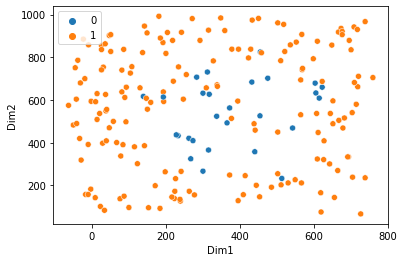

In [119]:
from sklearn.cluster import KMeans

ax = sns.scatterplot(data = X_test, x='dim1', y='dim2', palette="tab10", hue=y_test)
ax.set(xlabel='Dim1', ylabel='Dim2')

[Text(0.5, 0, 'Dim1'), Text(0, 0.5, 'Dim2')]

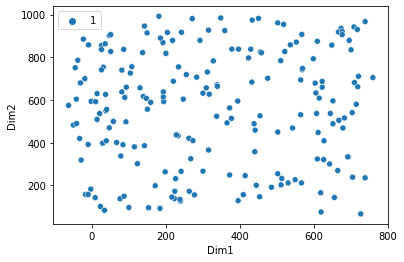

In [120]:
model = SVC(kernel='rbf', gamma='auto', C=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Coustering
ax = sns.scatterplot(data = X_test, x='dim1', y='dim2', palette="tab10", hue=y_pred)
ax.set(xlabel='Dim1', ylabel='Dim2')

# Clustering

=============================== Running Elbow Method ===============================


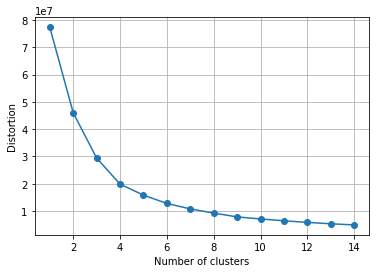

In [68]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
    km.fit(X_train)
    distortions.append(km.inertia_)
# plot
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid(axis="both")
plt.show()

[Text(0.5, 0, 'Dim1'), Text(0, 0.5, 'Dim2')]

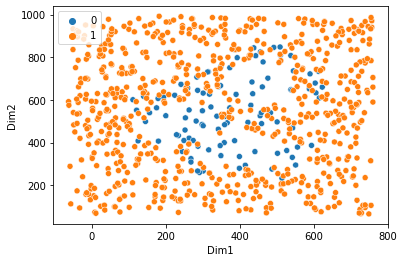

In [70]:
import seaborn as sns

# Plotting with Y
ax = sns.scatterplot(data = df, x='dim1', y='dim2', sizes=(20,6), palette="tab10", hue=y)
ax.set(xlabel='Dim1', ylabel='Dim2')

[Text(0.5, 0, 'Dim1'), Text(0, 0.5, 'Dim2')]

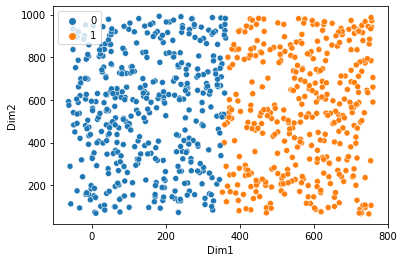

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()

scaled_features = scaler.fit_transform(X)

# Coustering
kmeans = KMeans(n_clusters = 2, init = 'random', n_init = 10, max_iter = 1000, random_state = 0) #, tol= 1e-04
kmeans.fit(scaled_features)

ax = sns.scatterplot(data = X, x='dim1', y='dim2', hue=kmeans.labels_, palette="tab10")
ax.set(xlabel='Dim1', ylabel='Dim2')

# Apply some kernel functions
## Higher dimension